In [308]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Add,Dropout, Dense,MaxPool2D, Activation,  BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D,ZeroPadding2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.keras.models import Model


In [325]:



image_dir =os.path.join(os.getcwd(),"train")
for dir in os.listdir(image_dir):
    print(os.path.join(image_dir,dir))


d:\AGE DETECTION\train\18-20
d:\AGE DETECTION\train\21-30
d:\AGE DETECTION\train\31-40
d:\AGE DETECTION\train\41-50
d:\AGE DETECTION\train\51-60


In [310]:
for dir in os.listdir(image_dir):
    imd=os.path.join(image_dir,dir)
    for img in (os.listdir(imd)):
        print(os.path.join(imd,img))
    

d:\AGE DETECTION\train\18-20\-old-hoy-who-has-recently-finished-his-studies-spain-and-want-live-liverpool.jpg
d:\AGE DETECTION\train\18-20\0.jpg
d:\AGE DETECTION\train\18-20\1.jpg
d:\AGE DETECTION\train\18-20\10.jpg
d:\AGE DETECTION\train\18-20\11.jpg
d:\AGE DETECTION\train\18-20\12.jpg
d:\AGE DETECTION\train\18-20\13.jpg
d:\AGE DETECTION\train\18-20\14.jpg
d:\AGE DETECTION\train\18-20\15.jpg
d:\AGE DETECTION\train\18-20\16.jpg
d:\AGE DETECTION\train\18-20\17.jpg
d:\AGE DETECTION\train\18-20\18.jpg
d:\AGE DETECTION\train\18-20\18m_Armando_1L.jpg
d:\AGE DETECTION\train\18-20\18m_Elijah_1L.jpg
d:\AGE DETECTION\train\18-20\19.jpg
d:\AGE DETECTION\train\18-20\1a1ee059aebe067372bf717dba92a2d3.jpg
d:\AGE DETECTION\train\18-20\2.jpg
d:\AGE DETECTION\train\18-20\20.jpg
d:\AGE DETECTION\train\18-20\21.jpg
d:\AGE DETECTION\train\18-20\22.jpg
d:\AGE DETECTION\train\18-20\23.jpg
d:\AGE DETECTION\train\18-20\24.jpg
d:\AGE DETECTION\train\18-20\3.jpg
d:\AGE DETECTION\train\18-20\4.jpg
d:\AGE DETECTI

In [326]:
features =[]
for dir in os.listdir(image_dir):
    imd=os.path.join(image_dir,dir)
    for img in tqdm(os.listdir(imd)):
        image_features=cv2.imread(os.path.join(imd,img))
        image_features = cv2.resize(image_features , (250,250))
        features.append(image_features)
        
        


100%|██████████| 25/25 [00:02<00:00,  8.56it/s]


In [327]:
image_dir_test =os.path.join(os.getcwd(),"test")
for dir in os.listdir(image_dir_test):
    imd=os.path.join(image_dir_test,dir)
    for img in tqdm(os.listdir(imd)):
        image_features=cv2.imread(os.path.join(imd,img))
        image_features = cv2.resize(image_features , (250,250))
        features.append(image_features)
        

100%|██████████| 5/5 [00:00<00:00, 12.75it/s]


In [328]:
features = np.array(features)
features.shape

(150, 250, 250, 3)

In [336]:
labels=[]
face_label=0
face_label_dictionary = {}
for dir in os.listdir(image_dir):
    imd = os.path.join(image_dir,dir)
    face_label_dictionary[face_label] =dir 
    for img in os.listdir(imd):
        labels.append(face_label)
    face_label += 1
    
    
    

In [337]:
face_label=0
face_label_dictionary = {}
for dir in os.listdir(image_dir_test):
    imd = os.path.join(image_dir_test,dir)
    face_label_dictionary[face_label] =dir 
    for img in os.listdir(imd):
        labels.append(face_label)
    face_label += 1

In [338]:
labels = np.array(labels)
face_label_dictionary

len(labels)

150

In [339]:
X=features
y=labels


In [340]:
X.shape

(150, 250, 250, 3)

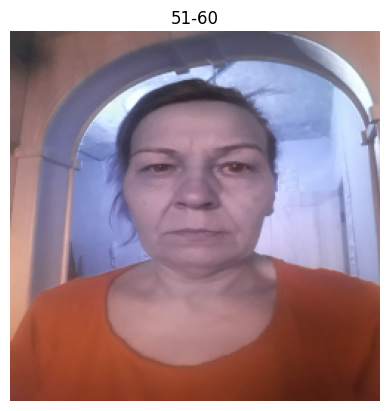

In [341]:

plt.imshow(X[100])
plt.title(face_label_dictionary[y[100]])
plt.axis("off")
plt.show()


In [342]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [343]:
X_train = X_train / 255
X_test = X_test  / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [349]:
model = Sequential()

model.add(Conv2D(8 , (3,3) , padding='same' , input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(8 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256 , (3,3) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(5 , activation='softmax'))

In [350]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_500 (Conv2D)         (None, 250, 250, 8)       224       
                                                                 
 activation_452 (Activation)  (None, 250, 250, 8)      0         
                                                                 
 batch_normalization_487 (Ba  (None, 250, 250, 8)      32        
 tchNormalization)                                               
                                                                 
 conv2d_501 (Conv2D)         (None, 250, 250, 8)       584       
                                                                 
 activation_453 (Activation)  (None, 250, 250, 8)      0         
                                                                 
 batch_normalization_488 (Ba  (None, 250, 250, 8)      32        
 tchNormalization)                                   

In [351]:
# optimizer= Adam(lr=0.001,beta_1=0.9 ,beta_2=0.999)

In [352]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [353]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [354]:
model.fit(datagen.flow(X_train,y_train , batch_size=32), 
          epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
4/4 [==============================] - 26s 6s/step - loss: 4.8643 - accuracy: 0.1667 - val_loss: 1.6068 - val_accuracy: 0.2333
Epoch 2/30
4/4 [==============================] - 26s 7s/step - loss: 3.0756 - accuracy: 0.2333 - val_loss: 1.6125 - val_accuracy: 0.2000
Epoch 3/30
4/4 [==============================] - 33s 8s/step - loss: 3.1049 - accuracy: 0.2917 - val_loss: 1.6108 - val_accuracy: 0.2000
Epoch 4/30
4/4 [==============================] - 33s 8s/step - loss: 2.8362 - accuracy: 0.2583 - val_loss: 1.6102 - val_accuracy: 0.2000
Epoch 5/30
4/4 [==============================] - 34s 8s/step - loss: 2.0380 - accuracy: 0.4417 - val_loss: 1.6412 - val_accuracy: 0.2000
Epoch 6/30
4/4 [==============================] - 33s 8s/step - loss: 1.7940 - accuracy: 0.4417 - val_loss: 1.6198 - val_accuracy: 0.1667
Epoch 7/30
4/4 [==============================] - 33s 8s/step - loss: 1.9048 - accuracy: 0.4083 - val_loss: 1.6096 - val_accuracy: 0.2333
Epoch 8/30
4/4 [==================

In [120]:
model.evaluate(X_train,y_train)

4/4 [==============================] - 2s 424ms/step - loss: 1.7024 - accuracy: 0.1900


[1.702392578125, 0.1899999976158142]

In [121]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 417ms/step - loss: 1.8136 - accuracy: 0.2400


[1.8135753870010376, 0.23999999463558197]

1/1 [==============================] - 0s 84ms/step


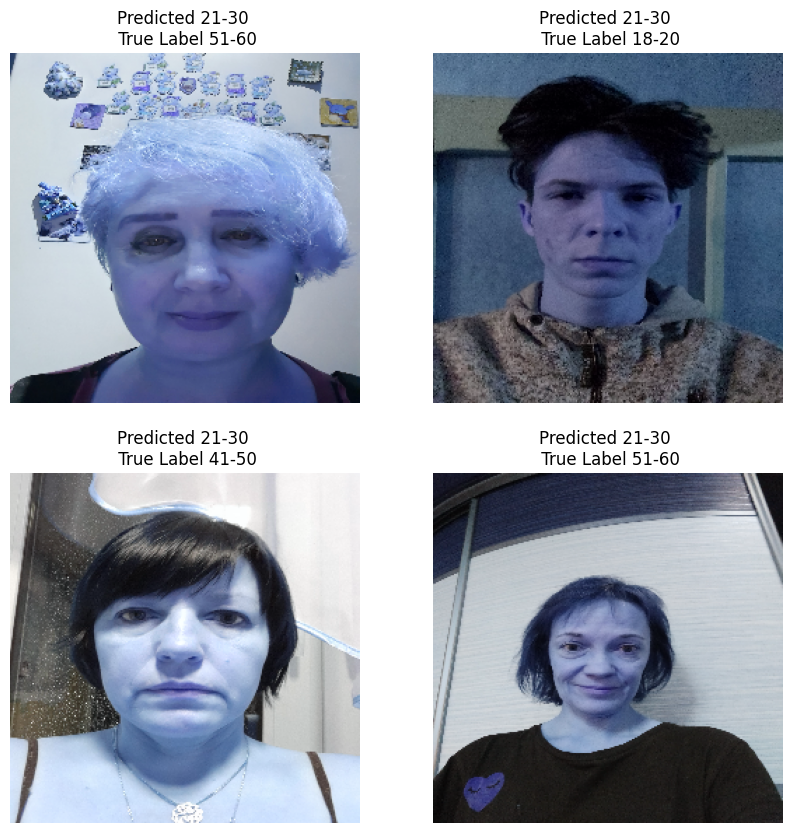

In [359]:
nrows=2
ncols=2
fig ,ax =plt.subplots(nrows,ncols,figsize=(10,10))

for row in range(nrows):
    for col in range(ncols):
        rand=np.random.randint(1,125)
        pred=model.predict(np.expand_dims(X[rand],axis=0)/255)
        label=np.argmax(pred)
        ax[row,col].imshow(X[rand])
        ax[row,col].set_title(f"Predicted {face_label_dictionary[label]} \n True Label {face_label_dictionary[y[rand]]}")
        ax[row,col].axis("off")



In [291]:
def identity_block(X,f,filters,s=2, initializer=glorot_uniform):
    F1,F2,F3=filters
    X_shortcut=X

    X = Conv2D(filters=F1, kernel_size=1, strides=(1,1), padding='valid', kernel_initializer=initializer(seed=0))(X)
    X=BatchNormalization(axis=3)(X, training = True)
    X = Activation('relu')(X)
    X = Conv2D(filters=F2, kernel_size=f, strides=(1,1), padding='same', kernel_initializer=initializer(seed=0))(X)
    X = BatchNormalization(axis=-1)(X, training=True) 
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=1, strides=(1,1), padding='valid', kernel_initializer=initializer(seed=0))(X)
    X = BatchNormalization()(X, training=True) 
    
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
    
    
    
    

In [292]:
def convolutional_block(X, f, filters, s = 2, training=True, initializer=glorot_uniform):
    
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(filters=F1, kernel_size=1, strides=(s, s), padding='valid', kernel_initializer=initializer(seed=0))(X)
    X = BatchNormalization(axis=3)(X, training=training)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=f, strides=(1, 1), padding='same', kernel_initializer=initializer(seed=0))(X) 
    X = BatchNormalization(axis=3)(X, training=training) 
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=1, strides=(1, 1), padding='valid', kernel_initializer=initializer(seed=0))(X)  
    X = BatchNormalization(axis=3)(X, training=training)  
    
    X_shortcut = Conv2D(filters=F3, kernel_size=1, strides=(s, s), padding='valid', kernel_initializer=initializer(seed=0))(X_shortcut)  
    X_shortcut = BatchNormalization(axis=3)(X_shortcut, training=training)  
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    return X
    

In [293]:
def ResNet(input_shape=(250,250,3),classes=5):
    X_input=Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Conv2D(64, (7, 7), strides=(2, 2), kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block(X, f=3, filters=[64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], s=2)  
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block(X, 3, [512, 512, 2048]) 
    X = identity_block(X, 3, [512, 512, 2048]) 

    X = tf.keras.layers.AveragePooling2D()(X)
    
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)
    model = Model(inputs = X_input, outputs = X)

    return model
    

In [294]:
model = ResNet(input_shape = (250, 250, 3), classes = 5)
print(model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 256, 256, 3)  0          ['input_12[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_418 (Conv2D)            (None, 125, 125, 64  9472        ['zero_padding2d_10[0][0]']      
                                )                                                           

In [295]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [296]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [297]:
model.fit(datagen.flow(X_train,y_train , batch_size=32), 
          epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
4/4 [==============================] - 117s 14s/step - loss: 15.4456 - accuracy: 0.1800 - val_loss: 3.0390 - val_accuracy: 0.2400
Epoch 2/30
4/4 [==============================] - 60s 19s/step - loss: 5.5599 - accuracy: 0.2000 - val_loss: 3.1761 - val_accuracy: 0.0800
Epoch 3/30
4/4 [==============================] - 59s 14s/step - loss: 4.4720 - accuracy: 0.2500 - val_loss: 2.6706 - val_accuracy: 0.1200
Epoch 4/30
4/4 [==============================] - 59s 19s/step - loss: 3.4795 - accuracy: 0.2000 - val_loss: 4.1156 - val_accuracy: 0.2800
Epoch 5/30
4/4 [==============================] - 59s 19s/step - loss: 2.9405 - accuracy: 0.2300 - val_loss: 3.7549 - val_accuracy: 0.2800
Epoch 6/30
4/4 [==============================] - 58s 13s/step - loss: 3.5265 - accuracy: 0.2300 - val_loss: 2.7023 - val_accuracy: 0.0800
Epoch 7/30
4/4 [==============================] - 60s 14s/step - loss: 2.8439 - accuracy: 0.1900 - val_loss: 1.7790 - val_accuracy: 0.4000
Epoch 8/30
4/4 [=========